In [1]:
from utils.FeatureCalculator import FeatureCalculator
import numpy as np
import pandas as pd
import os

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

'Current working directory: /nethome/yuxiang.wu/CCA-representation-ML/Dataset_Cleaned'

### Feature Calculation for Alloy Components

**Description**: This code block prepares and processes data about alloy compositions, specifically it creates a `FeatureCalculator` object from the defined compositions, then calculates and prints the corresponding alloy features.


In [2]:
# Define a list of component elements and their corresponding fractions
compo_elem = ["Ni", "Cr", "Mo", "Ti", "Fe"]
ele_frac = np.array([43.8, 38.3, 2.44, 1.04, 0])

# Create a dictionary mapping each element to its corresponding fraction,
ele_frac_dict = {elem: frac for elem, frac in zip(
    compo_elem, ele_frac)}

# Prepare data in the format required for FeatureCalculator - a list of tuples,
# where each tuple contains a list of elements and their corresponding fractions
compositions = [(list(ele_frac_dict.keys()), list(ele_frac_dict.values()))]

print(compositions)

# Create a FeatureCalculator object with the prepared compositions
calculator = FeatureCalculator(compositions)

# Calculate the features using the FeatureCalculator object
features = calculator.calculate_features()

print(features)

[(['Ni', 'Cr', 'Mo', 'Ti', 'Fe'], [43.8, 38.3, 2.44, 1.04, 0.0])]
[array([ 1.07257700e+02,  9.14284921e+00,  1.68265280e+05,  1.53842608e+06,
       -5.74967136e+04,  2.54891799e+06, -3.07385957e+02,  1.54108000e+02,
        1.40898674e+03,  6.86600000e+02,  6.27750827e+03,  1.46876000e+13,
        1.34286583e+05])]


### Data Loading, Feature Calculation, and Extraction

Reads various datasets from Excel files, calculates specific features for each material composition in these datasets using a custom `FeatureCalculator` class, extracts relevant data from the corrosion and hardness datasets, and displays the first rows of the extracted data.


In [1]:
import pandas as pd
from utils.FeatureCalculator import FeatureCalculator

# Initialization of the constants and the data to be loaded
feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]

# Lists of filenames, elements for each file, and the header rows for the data in each file
data_file_names = ["LiteratureDataset_Corrosion_YW_v3.xlsx", "LiteratureDataset_Hardness_YW_v3.xlsx", "MultiTaskModel_NiCrCoVFe_KW99_at_pct.xlsx", "MultiTaskModel_NiCrCoVFe_KW99_wt_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW130_at_pct.xlsx", "MultiTaskModel_NiCrMoTiFe_KW130_wt_pct.xlsx", "MultiTaskModel_NiCrMoTiFe_KW131_at_pct.xlsx", "MultiTaskModel_NiCrMoTiFe_KW131_wt_pct.xlsx"]
element_columns = [['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y'],
                   ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'], ['Ni', 'Cr', 'Co', 'V', 'Fe'], ['Ni', 'Cr', 'Co', 'V', 'Fe'], ['Ni', 'Cr', 'Mo', 'Ti', 'Fe'], ['Ni', 'Cr', 'Mo', 'Ti', 'Fe'], ['Ni', 'Cr', 'Mo', 'Ti', 'Fe'], ['Ni', 'Cr', 'Mo', 'Ti', 'Fe']]
df_header_list = [2, 2, 0, 0, 0, 0, 0, 0]

features_dfs = []

# Processing each data file along with the corresponding elements
for i in range(len(data_file_names)):
    # Load and preprocess data from each excel file
    data_df = pd.read_excel(data_file_names[i], header=df_header_list[i])
    element_fractions = data_df[element_columns[i]].fillna(0)

    # Calculate features for each composition
    compositions = [(element_columns[i], element_fraction)
                    for element_fraction in element_fractions.values]
    feature_calculator = FeatureCalculator(compositions)
    calculated_features = feature_calculator.calculate_features()

    # Store the calculated features in a DataFrame
    features_df = pd.DataFrame(calculated_features, columns=feature_names)
    features_dfs.append(features_df)

    # Extract and store specific data and features for the corrosion and hardness datasets
    if i == 0:  # Corrosion dataset
        df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output = element_fractions, data_df[[
            'TestTemperature_C', 'ChlorideIonConcentration', 'pH', 'ScanRate_mVs']], features_df, data_df[['AvgPittingPotential_mV']]
    if i == 1:  # Hardness dataset
        df_H_compo, df_H_specific_features, df_H_output = element_fractions, features_df, data_df[[
            'converted HV']]
        print(data_df.columns)

# Display the first row of the specific data, features, and output for the corrosion and hardness datasets
display(df_C_compo.head(1), df_C_specific_testing.head(1),
        df_C_specific_features.head(1), df_C_output.head(1))
display(df_H_compo.head(1), df_H_specific_features.head(1), df_H_output.head(1))

# # Display first few rows of each features DataFrame
# for df in features_dfs:
#     display(df.head())

Index(['Alloy ID', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf', 'delta_a',
       'Hmix', 'VEC', 'sigma_bulk_modulus', 'converted HV'],
      dtype='object')


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,TestTemperature_C,ChlorideIonConcentration,pH,ScanRate_mVs
0,50.0,0.005133,7.8,0.1


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,124.30836,9.9,186465.714,1.846011e+06,-29725.004,1.441756e+06,-370.81335,180.5656,1787.599615,779.48,7716.860233,1.678989e+13,166219.942589


,AvgPittingPotential_mV
0,287.0


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


,a,delta_a,Tm,sigma_Tm,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus
0,126.69848,9.900001,179579.93,1.777843e+06,-42038.7456,2.657898e+06,-299.679129,177.0884,1753.175704,806.21,7981.49141,1.625460e+13,160920.693702


,converted HV
0,140.913294


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus,AvgPittingPotential_mV
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,-29725.004,1.441756e+06,-370.81335,180.5656,1787.599615,779.48,7716.860233,1.678989e+13,166219.942589,287.0


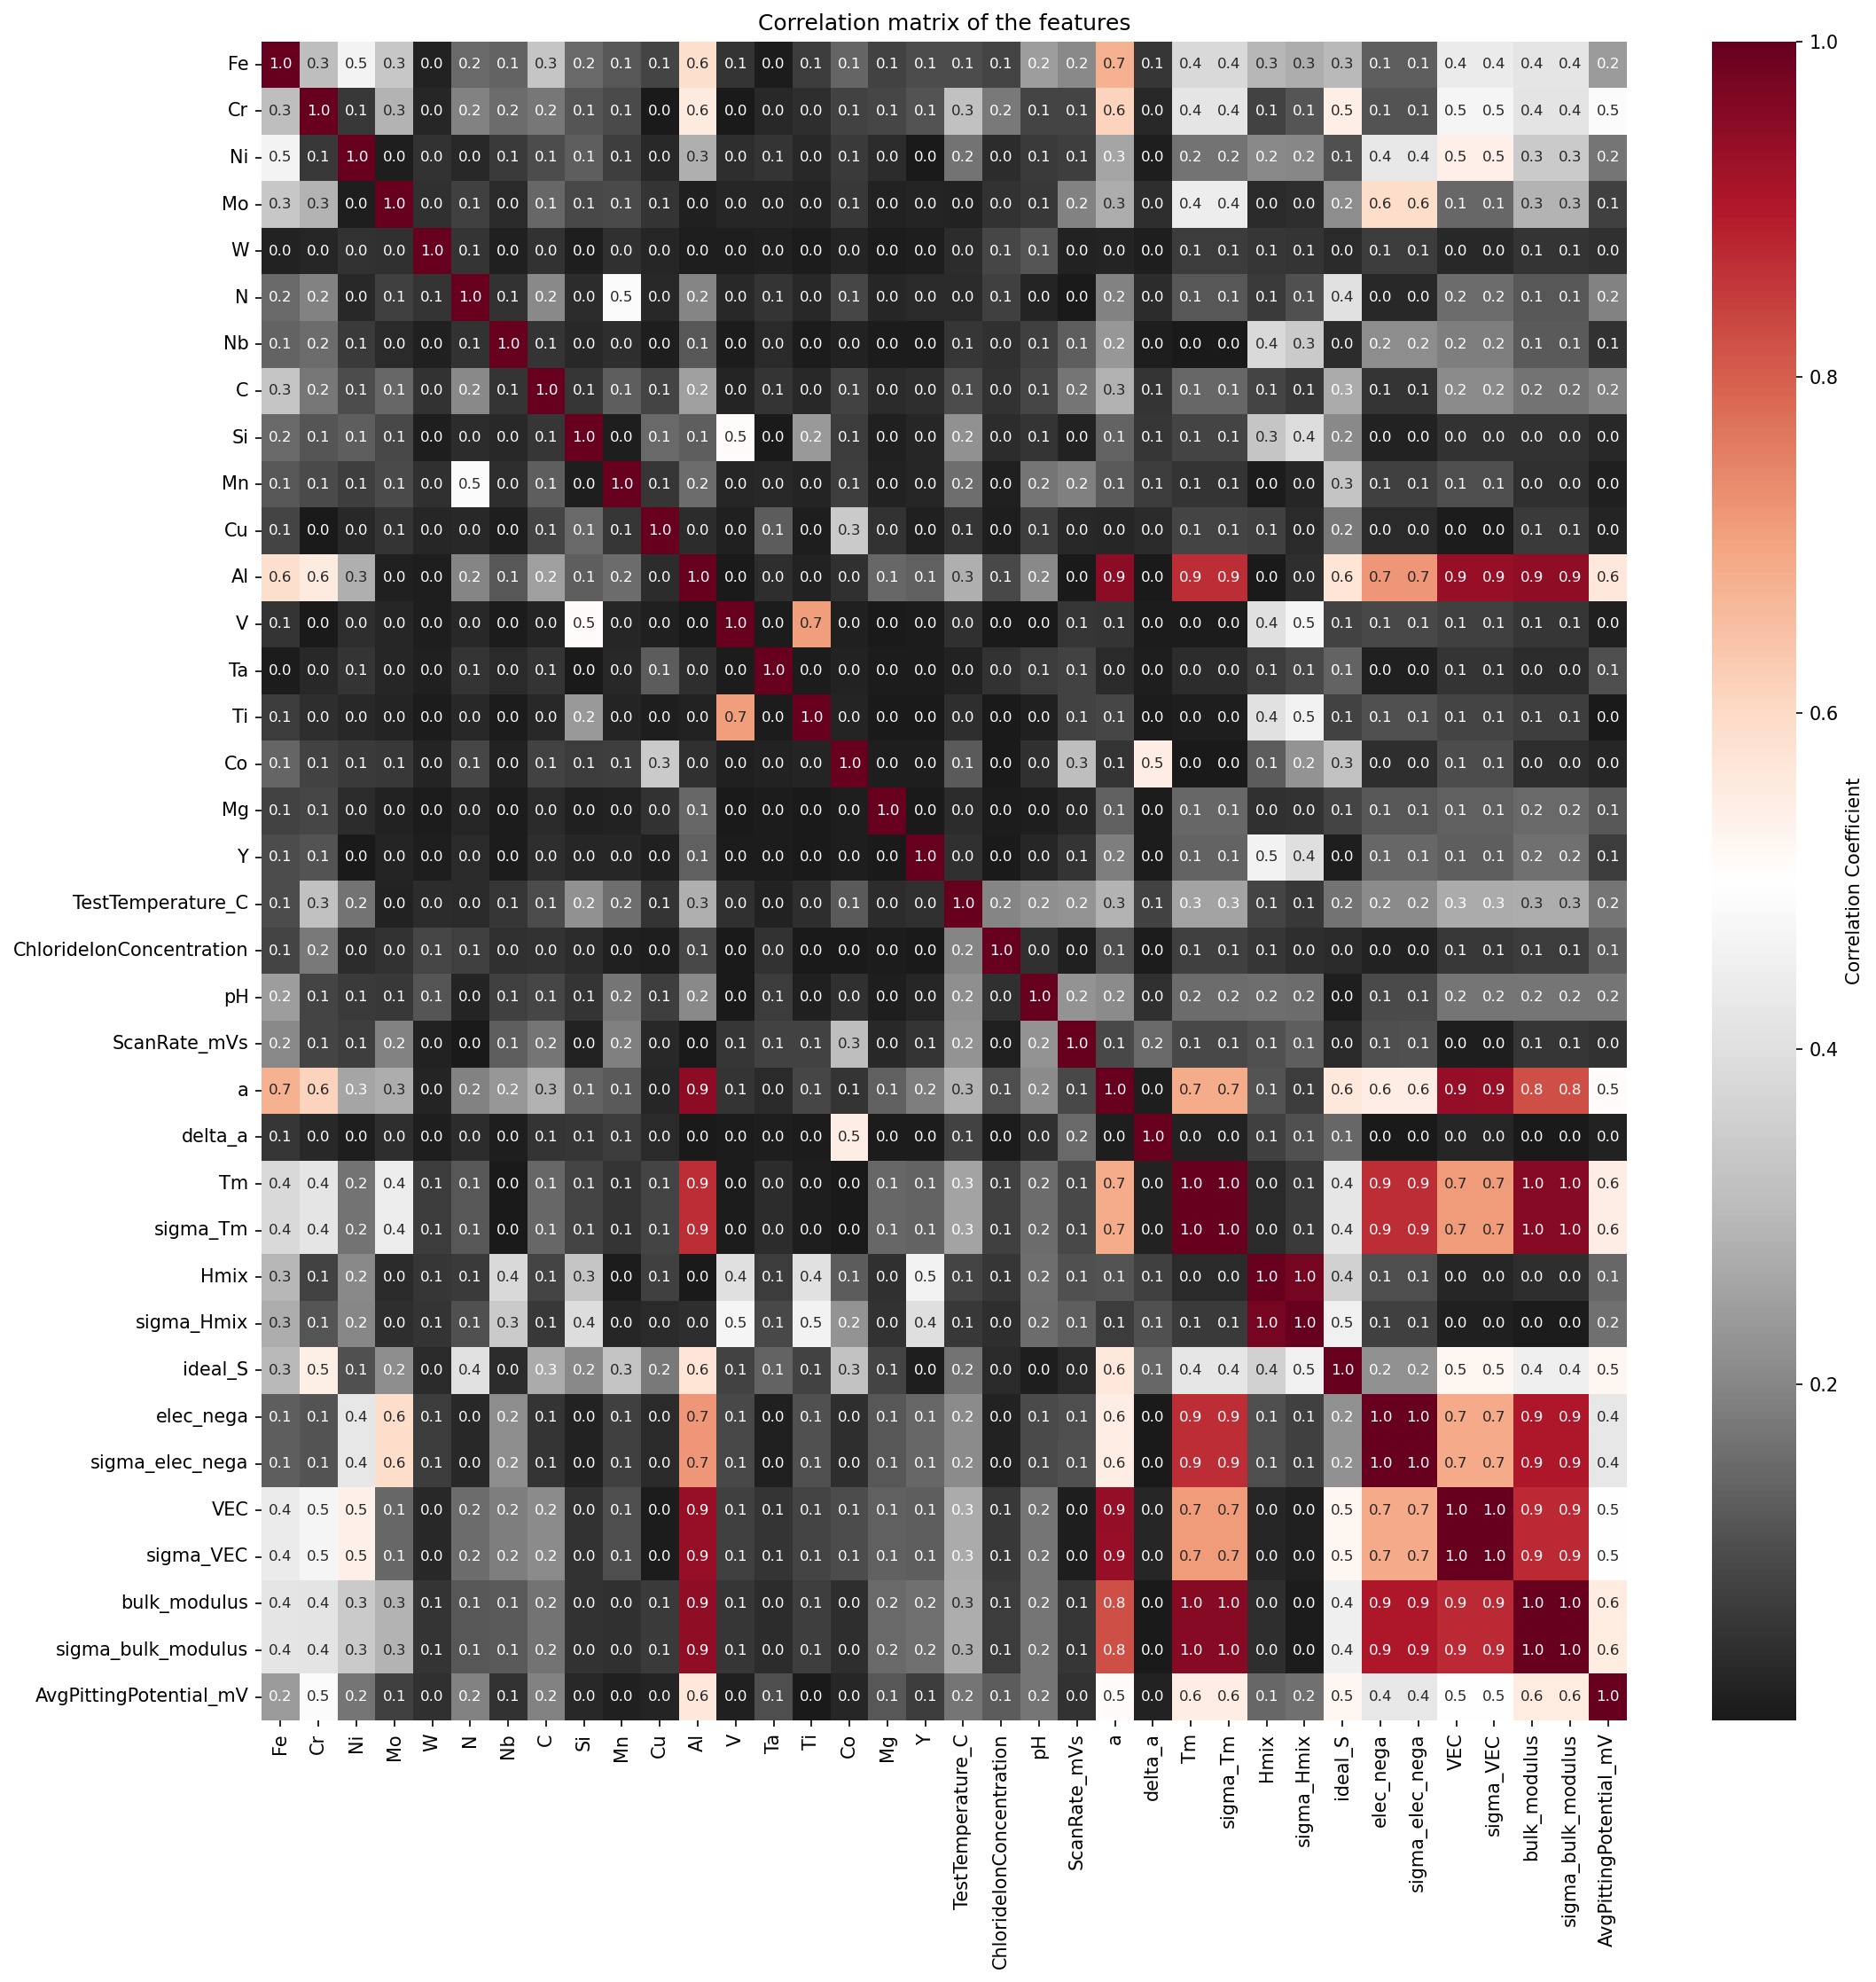

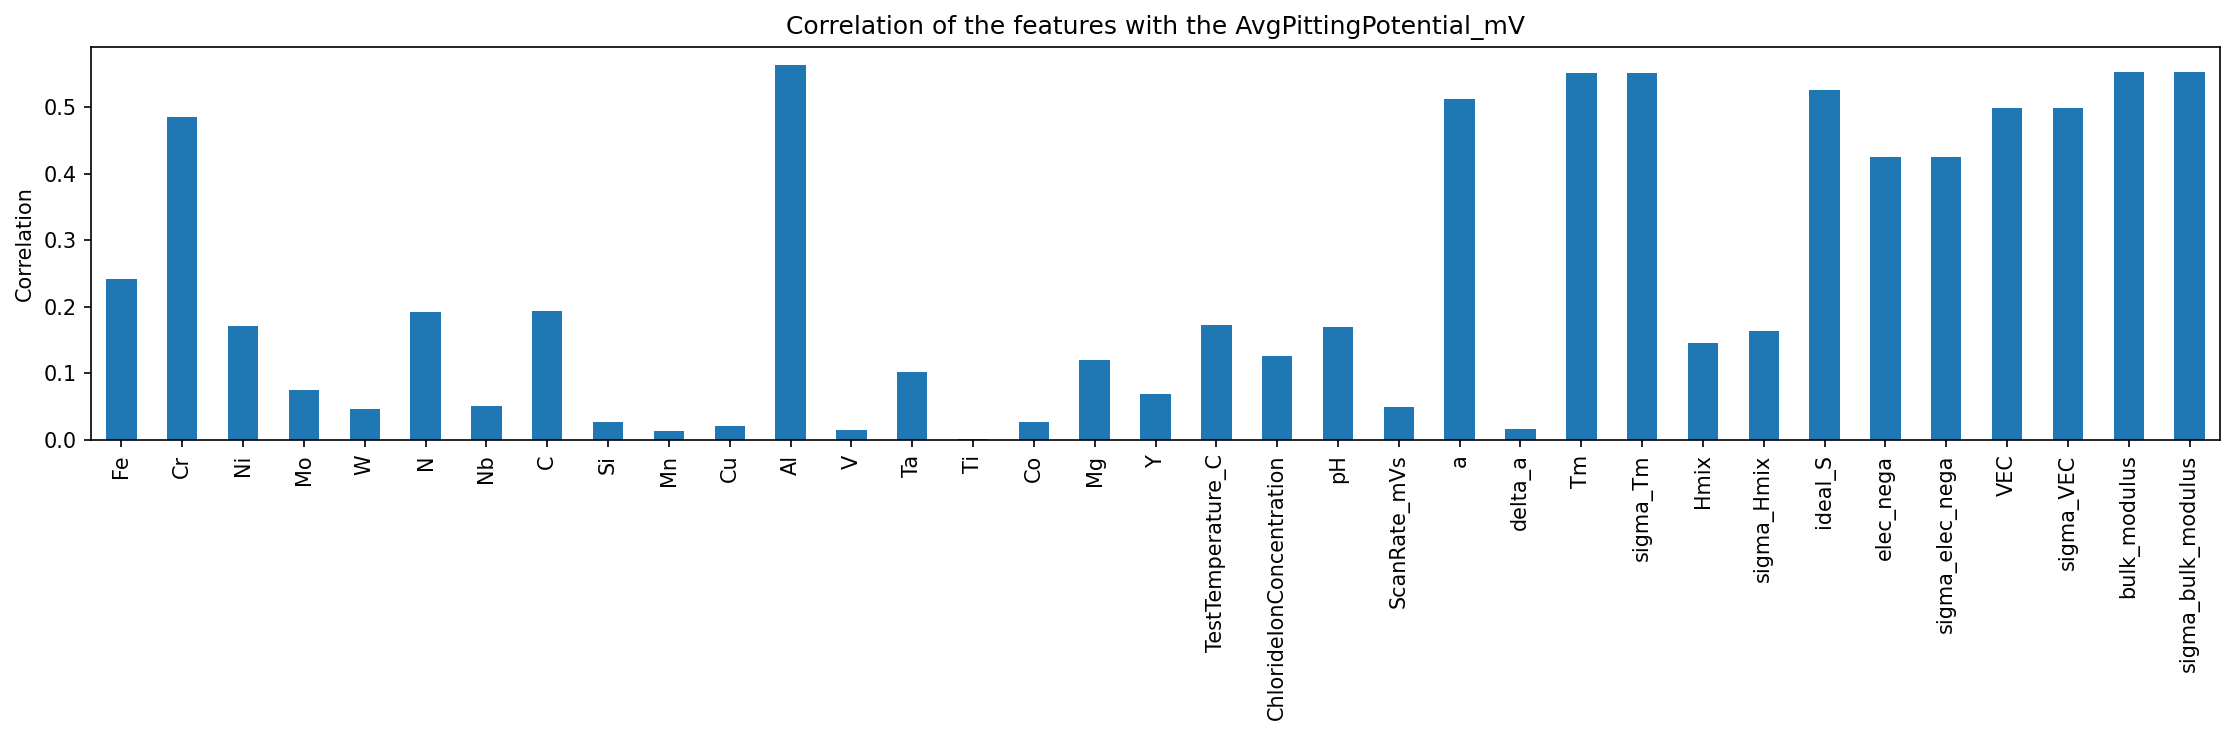

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# concatenate the below dataframes
df_C = pd.concat([df_C_compo, df_C_specific_testing,
                 df_C_specific_features, df_C_output], axis=1)

display(df_C.head(1))

# Compute the correlation matrix
corr_matrix = df_C.corr().abs()


plt.figure(figsize=(15, 15), dpi=150)

# Subplot 1 for the correlation heatmap

sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})  # adjust size as needed
plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Subplot 2 for the correlation of each feature with the target
plt.figure(figsize=(10, 5), dpi=150)

df_C.drop('AvgPittingPotential_mV', axis=1).apply(lambda x: x.corr(
    df_C['AvgPittingPotential_mV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the AvgPittingPotential_mV")
plt.ylabel("Correlation")
# make x-axis 45 degree angle
# plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:


# Step 1: Identify features with high correlation to the target
target_corr = df_C.drop('AvgPittingPotential_mV', axis=1).apply(
    lambda x: x.corr(df_C['AvgPittingPotential_mV'])).abs()
high_corr_features = target_corr[target_corr > 0.5].index.tolist()
# make sure the feature is in df_C_specific_features
high_corr_features = [
    feature for feature in high_corr_features if feature in df_C_specific_features.columns.tolist()]


# Step 2: Check for multicollinearity
corr_matrix_high_corr_features = corr_matrix.loc[high_corr_features,
                                                 high_corr_features]

# Print correlations greater than 0.8, excluding self-correlations (which are always 1)
multicollinearity_pairs = corr_matrix_high_corr_features[
    corr_matrix_high_corr_features < 1][corr_matrix_high_corr_features > 0.8]

print(multicollinearity_pairs.dropna(
    how='all', axis=1).dropna(how='all', axis=0))


# You can now manually inspect the output to decide which of the highly correlated features to retain

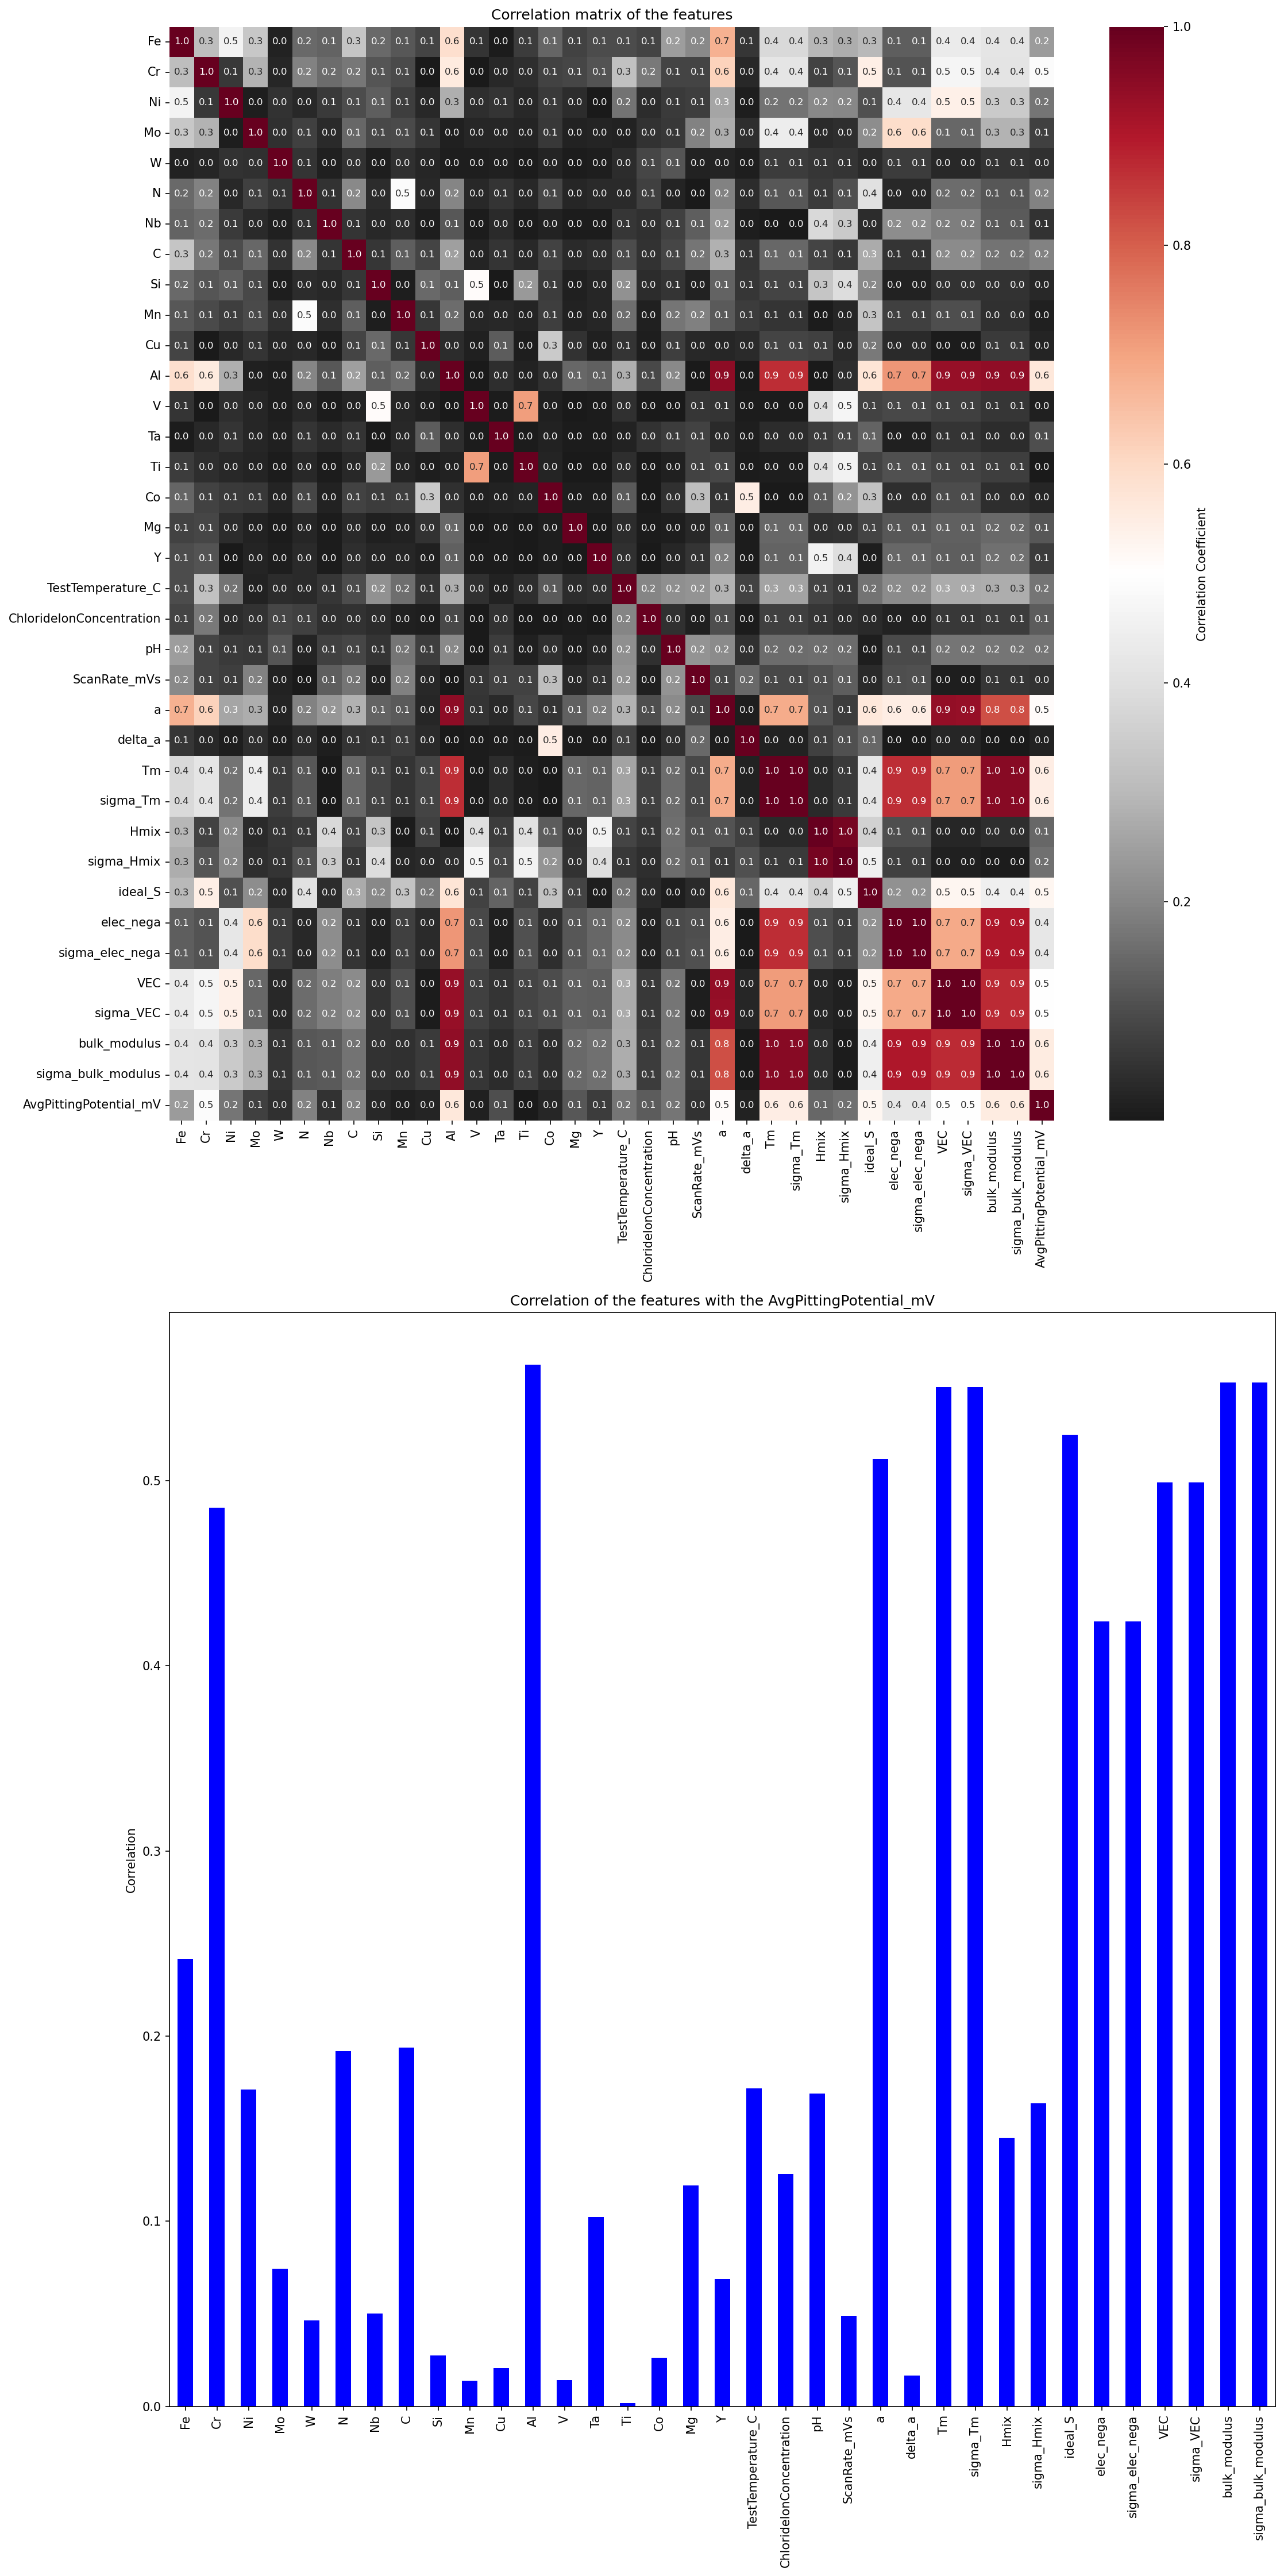